# **Teste de Hipóteses**

**Testes Paramétricos**

Os testes paramétricos são testes estatísticos que assumem **suposições** sobre os dados e que tais suposições precisam ser verdadeiras para dar robustez e validade aos resultados do teste. Dentre as suposições, podemos citar como exemplo: a variável possuir uma distribuição normal; a variável ser homocedástica, ou seja, a variância dos resíduos ser constante; ou até mesmo ausência de outliers (dados muito distantes da média e que distorce a distribuição). Existe uma infinidade de testes paramétricos, cada um com suas peculiaridades e suposições que podem ser aplicados a diferentes cenários. O que usaremos, nesse estudo de caso será o teste t de Student.

**Testes Não Paramétricos**

Em contrapartida, os testes não parámetricos são uma alternativa aos testes paramétricos, quando as suposições dos testes paramétricos não são validadas. Os testes não parámetricos são mais flexíveis (não precisando que os dados sigam uma distribuição normal, por exemplo) e possuem maior versatilidade, podendo ser usados em dados categóricos. Dentre exmeplos, podemos destacar o teste qui-quadrado e o teste Mann-Whitney (alternativa ao teste t de Student).

**Conclusão**

Os testes paramétricos precisam ser preferencialmente utilizados, pois conferem maior robustez e confiança aos resultados apresentados sobre inferências da população. Todavia, os testes não paramétricos também são válidos para realizar inferências populacionais e são mais versáteis em termos de usabilidade.

**Por que é FUNDAMENTAL realizar testes estatísticos?**

A importância dos testes estatísticos está na confiança de que os resultados do teste conferem às inferências realizadas sobre a população. Para saber se há diferença entre os grupos de homem e mulher que consomem e não consomem álcool, eu poderia tirar essa conclusão apenas da tabela de contingência (pd.crosstab()) realizada na preparação para fazer o teste qui-quadrado. Todavia, isso não seria a prática ideal de fazer a inferência, uma vez que essa diferença poderia ser obra do acaso. O teste estatístico mede a incerteza e a possibilidade de generalizar os resultados para além da amostra. Ou seja,

* Olhar na distribuição: Descreve o que a distribuição está mostrando.
* Fazer um teste: Quantifica o quanto se pode confiar no que a distribuição está mostrando.

A seguir, faremos uma aplicação de testes paramétricos e não paramétricos em uma base de pacientes que tem dados sobre informações clínicas, como IMC, Nível de Glicose, Nível de Colesterol, Pressão Sanguínea, dentre outras variáveis.

## Carregando os pacotes

In [1]:
# Bibliotecas
import random
import pandas as pd
import numpy as np
import scipy
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
random.seed(42)

## Carregando os dados

In [2]:
df = pd.read_csv(r'C:\Users\glauber.lima\Desktop\Glauber\6-Dados\saude.csv')
df.sample(5)

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
14517,68.0,Female,Diabetes,150.63,NaN,33.60,96.00,7,215.33,225.65,6.51,0,0,4.37,1.62,0,7.75,6.37,ipsum,-112.913263
21800,25.0,Female,Obesity,120.66,152.83,46.19,93.74,2,232.90,48.01,6.31,0,0,1.84,3.48,0,4.13,7.01,###,91.385588
26416,51.0,NaN,Hypertension,90.96,171.87,30.65,96.78,2,269.02,226.57,4.80,1,0,4.19,5.11,1,6.43,5.77,lorem,-13.699170
4230,27.0,Male,Asthma,91.27,126.35,29.14,97.99,6,214.92,226.71,5.45,0,1,2.68,2.67,0,8.24,5.64,??,118.465246
21465,NaN,NaN,Healthy,NaN,110.48,30.33,98.56,2,180.07,150.19,5.29,0,0,7.22,7.80,0,2.98,7.51,lorem,-55.540898


## Análise Exploratória

In [3]:
# Dimensão
print("Total de registros: ", df.shape[0])
print("Total de colunas: ", df.shape[1])

Total de registros:  30000
Total de colunas:  20


In [4]:
# Renomeando as colunas
colunas = ['idade','genero','condicao_medica','glicose','pressao_arterial','imc','saturacao','tempo_no_hospital', 'colesterol','triglicerideos','taxa_hemoglobina','fumante','alcool','atividade_fisica','score_dieta','historico_familiar','stress','horas_sono','notas','ruido']
df.columns = colunas
df.head()

,idade,genero,condicao_medica,glicose,pressao_arterial,imc,saturacao,tempo_no_hospital,colesterol,triglicerideos,taxa_hemoglobina,fumante,alcool,atividade_fisica,score_dieta,historico_familiar,stress,horas_sono,notas,ruido
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


In [5]:
# Removendo as duas ultimas colunas
df = df.iloc[:,0:18]
df.tail()

,idade,genero,condicao_medica,glicose,pressao_arterial,imc,saturacao,tempo_no_hospital,colesterol,triglicerideos,taxa_hemoglobina,fumante,alcool,atividade_fisica,score_dieta,historico_familiar,stress,horas_sono
29995,54.0,Female,Healthy,86.35,127.68,28.30,94.36,1,218.60,152.82,4.85,0,0,9.15,10.35,0,3.65,8.71
29996,41.0,Male,Asthma,89.24,154.37,24.93,96.07,4,198.30,176.81,5.36,1,0,3.34,3.40,0,6.72,2.81
29997,83.0,Female,NaN,NaN,170.11,30.55,97.83,3,210.13,168.76,5.05,0,0,4.53,4.50,0,4.31,3.61
29998,41.0,Male,Diabetes,242.87,152.97,23.57,99.17,3,208.86,224.21,7.59,0,0,3.16,2.59,0,7.10,5.80
29999,46.0,Female,Hypertension,86.52,159.26,34.55,96.60,4,217.37,141.28,5.77,1,0,4.91,5.82,1,3.64,5.47


In [6]:
# Informações Gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idade               25500 non-null  float64
 1   genero              25500 non-null  object 
 2   condicao_medica     25500 non-null  object 
 3   glicose             25500 non-null  float64
 4   pressao_arterial    25500 non-null  float64
 5   imc                 30000 non-null  float64
 6   saturacao           30000 non-null  float64
 7   tempo_no_hospital   30000 non-null  int64  
 8   colesterol          30000 non-null  float64
 9   triglicerideos      30000 non-null  float64
 10  taxa_hemoglobina    30000 non-null  float64
 11  fumante             30000 non-null  int64  
 12  alcool              30000 non-null  int64  
 13  atividade_fisica    30000 non-null  float64
 14  score_dieta         30000 non-null  float64
 15  historico_familiar  30000 non-null  int64  
 16  stre

In [7]:
# Valores duplicados
df.duplicated().sum()

np.int64(0)

In [8]:
# Valores ausentes
df.isna().sum()

idade                 4500
genero                4500
condicao_medica       4500
glicose               4500
pressao_arterial      4500
imc                      0
saturacao                0
tempo_no_hospital        0
colesterol               0
triglicerideos           0
taxa_hemoglobina         0
fumante                  0
alcool                   0
atividade_fisica         0
score_dieta              0
historico_familiar       0
stress                   0
horas_sono               0
dtype: int64

---

## Teste Qui-Quadrado

Descrição: Técnica estatística para determinar se existe uma associação significativa entre duas variáveis categóricas.

Objetivo: Verificar se existe associação entre as variáveis 'genero' e 'alcool'. Em outras palavras, queremos saber se existe influência o usuário ser homem ou mulher no consumo de álcool.

Hipóteses:

* **Hipóteses Nula (H0):** Não existe associação entre as variáveis 'genero' e 'alcool', isto é, a pessoa ser homem ou mulher não é fator que influencie o consumo de álcool.
* **Hipóteses Alternativa (H1):** Existe associação entre as variáveis 'genero' e 'alcool', isto é, a pessoa ser homem ou mulher influencia o consumo de álcool.

In [ ]:
# Verificando valores das colunas 'genero' e 'alcool'
print(df.value_counts('genero'))
print(df.value_counts('alcool'))

genero
Female    12865
Male      12635
Name: count, dtype: int64
alcool
0    22844
1     7156
Name: count, dtype: int64


Para a variável gênero, nota-se que a distribuição está praticamente 50/50 entre homens e mulheres. Vale ressaltar que os valores ausentes não estão sendo contabilizados. Já em relação ao consumo de álcool, há muito mais pessoas que não consomem álcool (alcool = 0), do que pessoas que consomem álcool. Abaixo, podemos ver um gráfico que ilustra essa relação.

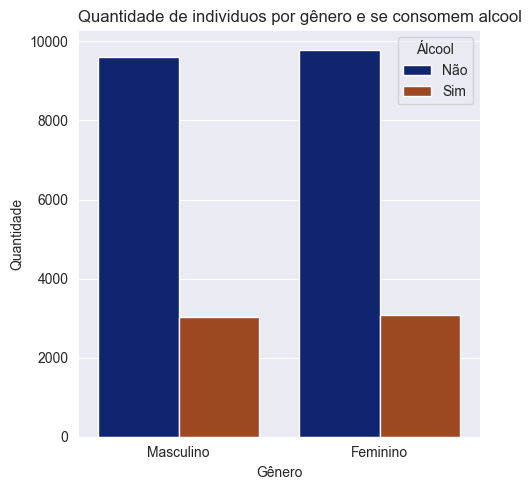

In [46]:
# Grafico
plt.figure(figsize=(5,5))
sns.set_style("darkgrid")
sns.countplot(data = df, x = 'genero', hue = 'alcool', palette='dark')
plt.xlabel("Gênero")
plt.ylabel("Quantidade")
plt.title("Quantidade de individuos por gênero e se consomem alcool", loc='left')
plt.xticks(['Male', 'Female'], ['Masculino', 'Feminino'])
plt.legend(labels = ['Não', 'Sim'], title = 'Álcool')
plt.tight_layout()
plt.show();

In [18]:
# Criando a tabela de contingencia
df_qui = df[['genero','alcool']]
df_qui.dropna(inplace = True)
tabela = pd.crosstab(df_qui['genero'], df_qui['alcool'])
tabela

alcool,0,1
genero,,
Female,9788,3077
Male,9617,3018


In [19]:
# Taxa de alcool (percentual das pessoas que consomem alcool)
taxa_alcool = df_qui.groupby('genero')['alcool'].mean()
taxa_alcool

genero
Female    0.239176
Male      0.238860
Name: alcool, dtype: float64

In [20]:
# Hipoteses do teste
alfa = 0.05
h0 = 'Não existe associação entre as variáveis "genero" e "alcool"'
h1 = 'Existe associação entre as variáveis "genero" e "alcool"'

In [21]:
# Aplicação do teste
chi_2, p_value,_,_ = chi2_contingency(tabela)

In [22]:
# Estatisticas do teste
print('Chi-squared Statistic:', round(chi_2,4))
print('p-value:', round(p_value,4))

Chi-squared Statistic: 0.002
p-value: 0.9646


In [23]:
# Interpretação
if p_value <= alfa:
  print('Hipótese nula rejeitada:', h1)
else:
  print('Hipótese nula não rejeitada:', h0)

Hipótese nula não rejeitada: Não existe associação entre as variáveis "genero" e "alcool"


---

## Teste T de Student

Descrição: Técnica usada para comparar médias de dois grupos independentes e checar se há diferença significativa entre a média dos grupos.

Objetivo: Verificar se a média entre dois grupos são estatisticamente diferentes. Em outras palavras, queremos saber se há diferença significativa na média entre as pessoas que consomem alcool e das pessoas que não consomem alcool.

Hipóteses:

* **Hipóteses Nula (H0):** Não existe diferença significativa entre a média dos dois grupos.
* **Hipóteses Alternativa (H1):** Existe diferença significativa entre a média dos dois grupos.

In [24]:
# Separação por genero
masculino = df[df['genero'] == 'Male']
feminino = df[df['genero'] == 'Female']
taxa_alcool_m = masculino['alcool'].mean()
taxa_alcool_f = feminino['alcool'].mean()
print('Média de alcool entre homens: ', round(taxa_alcool_m,4))
print('Média de alcool entre mulheres: ', round(taxa_alcool_f,4))

Média de alcool entre homens:  0.2389
Média de alcool entre mulheres:  0.2392


In [25]:
# Hipoteses
alfa = 0.05
h0 = 'Não existe diferença significativa entre a média dos dois grupos.'
h1 = 'Existe diferença significativa entre a média dos dois grupos.'

In [26]:
# Teste
t_stat, p_value = ttest_ind(masculino['alcool'], feminino['alcool'])

In [27]:
# Estatisticas
print('t-statistic:', round(t_stat,4))
print('p-value:', round(p_value,4))

t-statistic: -0.0591
p-value: 0.9529


In [28]:
# Interpretação
if p_value <= alfa:
  print('Hipótese nula rejeitada:', h1)
else:
  print('Hipótese nula não rejeitada:', h0)

Hipótese nula não rejeitada: Não existe diferença significativa entre a média dos dois grupos.


---

## Teste de normalidade

Verificar a suposição de normalidade para validar os resultados do teste T de Student. Faremos isso usando o teste shapiro-wilk

Hipóteses:

* **Hipóteses Nula (H0):** Os dados são normalmente distribuídos.
* **Hipóteses Alternativa (H1):** Os dados não são normalmente distribuídos.

In [29]:
# Aplicação do teste
stat_m, p_value_m = shapiro(masculino['alcool'])
stat_f, p_value_f = shapiro(feminino['alcool'])

In [30]:
# Estatisticas do teste
print("P_Valor_Masculino: ",p_value_m)
print("P_Valor_Feminino: ",p_value_f)

P_Valor_Masculino:  2.654693649383089e-102
P_Valor_Feminino:  9.140082912848287e-103


In [31]:
# Interpretação
alfa = 0.05
if p_value_m <= alfa:
  print('Hipótese nula rejeitada. Provavelmente, os dados do genero masculino vinheram de uma população que não é normalmente distribuída.')
else:
  print('Hipótese nula não rejeitada. Provavelmente, os dados do genero masculino vinheram de uma população normalmente distribuída.')
if p_value_f <= alfa:
  print('Hipótese nula rejeitada. Provavelmente, os dados do genero feminino vinheram de uma população que não é normalmente distribuída.')
else:
  print('Hipótese nula não rejeitada. Provavelmente, os dados do genero feminino vinheram de uma população normalmente distribuída.')

Hipótese nula rejeitada. Provavelmente, os dados do genero masculino vinheram de uma população que não é normalmente distribuída.
Hipótese nula rejeitada. Provavelmente, os dados do genero feminino vinheram de uma população que não é normalmente distribuída.


Considerando isso, precisaremos usar um teste não paramétrico, uma vez que a suposição de normalidade não foi atendida e, por isso, os resultados do teste T de Student não podem ser considerados. Utilizaremos o teste Mann-Whitney, também chamado de teste U.

---

## Teste Mann-Whitney (Teste U)

Descrição: O teste Mann-Whitney é uma alternativa não paramétrica ao teste T de Student. Nele são comparadas as medianas de dois grupos para verificar se são estatisticamente distintos.

Hipóteses:

* **Hipóteses Nula (H0):** A mediana entre os dois grupos não são estatisticamente distintas.
* **Hipóteses Alternativa (H1):** A mediana entre os dois grupos são estatisticamente distintas.

In [ ]:
# Hipoteses do teste
alfa = 0.05
h0 = 'Não há diferença significativa na mediana entre os dois grupos'
h1 = 'Há diferença significativa na mediana entre os dois grupos'

In [ ]:
# Teste
stats_u, p_valor = mannwhitneyu(masculino['alcool'], feminino['alcool'], alternative='two-sided')

In [ ]:
# Estatisticas
print("Estatistica do teste U: ",stats_u)
print("P-valor: ",p_valor)

Estatistica do teste U:  81248975.0
P-valor:  0.9528661290691463


In [ ]:
# Interpretação
if p_valor <= alfa:
    print(f'Rejeita H0, {h1}')
else:
    print(f'Não rejeita H0, {h0}')

Não rejeita H0, Não há diferença significativa na mediana entre os dois grupos


---

## Conclusão

Desse modo, a partir dos testes estatísticos realizados, concluimos que não há associação entre as variáveis álcool e gênero, isto é, o indivíduo ser homem ou mulher não é um fator que vai impactar no consumo de álcool.